In [ ]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [ ]:
data, y = make_blobs(n_samples=250, n_features=2, centers=5, random_state=40)

In [ ]:
data = np.array(data)

In [ ]:
X=data

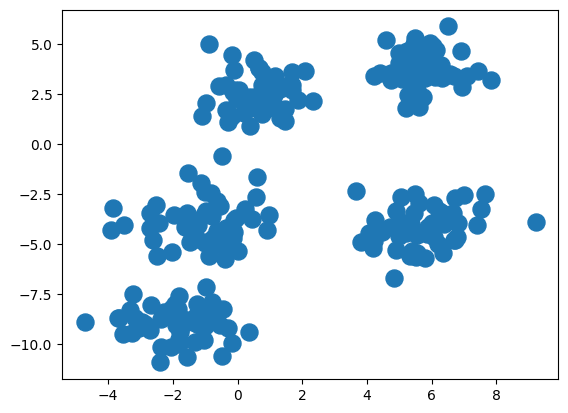

In [ ]:
plt.scatter(X[:,0], X[:,1], s=150)
plt.show()

In [ ]:
colors = 10*["g","r","c","b","k"]

In [ ]:
y

array([2, 3, 1, 2, 4, 1, 0, 2, 2, 0, 2, 4, 1, 0, 2, 2, 3, 3, 4, 3, 0, 1,
       1, 2, 4, 3, 3, 3, 4, 3, 3, 1, 0, 3, 3, 3, 1, 4, 1, 2, 3, 3, 0, 4,
       3, 2, 4, 4, 1, 3, 4, 1, 3, 2, 2, 4, 1, 2, 3, 4, 3, 1, 0, 0, 0, 4,
       0, 1, 1, 4, 0, 4, 4, 0, 4, 4, 1, 4, 4, 3, 2, 3, 1, 2, 1, 2, 1, 0,
       0, 4, 1, 1, 2, 3, 4, 0, 2, 3, 3, 2, 1, 4, 2, 2, 0, 2, 3, 0, 1, 1,
       3, 4, 4, 2, 4, 0, 3, 0, 2, 4, 2, 4, 0, 4, 3, 1, 1, 0, 0, 1, 0, 1,
       4, 2, 3, 1, 1, 1, 2, 3, 3, 0, 2, 0, 4, 3, 4, 0, 3, 4, 2, 1, 0, 2,
       3, 0, 2, 0, 4, 2, 2, 3, 0, 1, 3, 2, 0, 3, 3, 3, 3, 0, 4, 0, 3, 0,
       1, 2, 2, 4, 0, 1, 2, 0, 4, 2, 3, 0, 3, 1, 1, 1, 0, 1, 3, 2, 1, 1,
       0, 2, 0, 2, 3, 0, 4, 0, 0, 4, 3, 2, 1, 4, 4, 4, 3, 2, 1, 3, 2, 1,
       4, 4, 0, 1, 1, 0, 4, 2, 2, 2, 1, 1, 2, 2, 0, 0, 1, 3, 3, 1, 4, 4,
       1, 4, 0, 0, 4, 2, 0, 4])

In [ ]:
class K_Means:
    def __init__(self, k=5, tol=0.001, max_iter=300):
        self.k = k
        self.tol = tol
        self.max_iter = max_iter

    def fit(self,data):

        self.centroids = {}

        for i in range(self.k):
            self.centroids[i] = data[i]

        for i in range(self.max_iter):
            self.classifications = {}

            for i in range(self.k):
                self.classifications[i] = []

            for featureset in data:
                distances = [np.linalg.norm(featureset-self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(featureset)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification],axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                if np.sum((current_centroid-original_centroid)/original_centroid*100.0) > self.tol:
                    print(np.sum((current_centroid-original_centroid)/original_centroid*100.0))
                    optimized = False

            if optimized:
                break

    def predict(self,data):
        distances = [np.linalg.norm(data-self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

In [ ]:
def wcss(kmeans, data):
    # Initialize WCSS
    wcss = 0

    # Iterate over each cluster and calculate the squared distances
    for classification in kmeans.classifications:
        for featureset in kmeans.classifications[classification]:
            wcss += np.sum((featureset - kmeans.centroids[classification]) ** 2)

    return wcss


12171.177105883322
6287.405578119178
4.305028397698063
209.31148534426956
18.44872096007998
17.020418493673727
43.49068780400961
1.4222185101894862
4.423186272677629
209.31148534426956
18.44872096007998
6.153226458092579
1.4222185101894862
2.8019365651656383
209.31148534426956
11.539937861126866
6.153226458092579
2.960388924157313
1.4222185101894862
3.3269890440106167
2.8019365651656383
209.31148534426956
150.77655818426402
3.892438151783068
6.153226458092579
2.960388924157313
1.3999363684423278
3.3269890440106167
7.948918334136826
1.4238858524052873
8.560010206805677
5.895133741725836
4.246789275215585
4.809178642721423
168.24647237027855
150.77655818426402
108.05911643800253
6.0652702815648185
2.960388924157313
1.3999363684423278
13.04148019502273
12.270456251656368
3.3269890440106167
22.88525095972382
16.098521093434687
6.45439795529074
15.647502540191313
5.195492794888712
2.005866075214506
10.600821734926253
16.63192709128555
24.6323909780739
7.529274070689752
20.722372760934622
3.

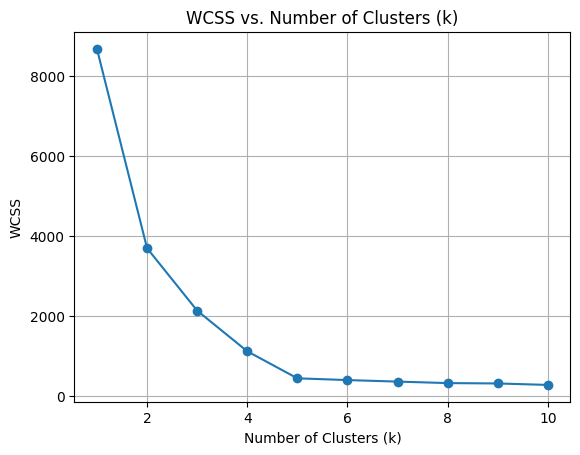

In [ ]:
# List to store WCSS values
wcss_values = []

# Range of k values (e.g., 1 to 10)
k_values = range(1, 11)

# Generate WCSS for each k value
# for k in k_values:
#     kmeans = K_Means(k=k)
#     kmeans.fit(data)
#     wcss_values.append(wcss(kmeans, data))

# Plot the WCSS values
plt.plot(k_values, wcss_values, marker='o')
plt.title('WCSS vs. Number of Clusters (k)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [ ]:
#KMeans with optimal K (choose k=4 based on elbow plot)
optimal_k = 5
kmeans = K_Means(k=optimal_k)
kmeans.fit(X)

4.423186272677629
209.31148534426956
18.44872096007998
6.153226458092579
1.4222185101894862
2.8019365651656383


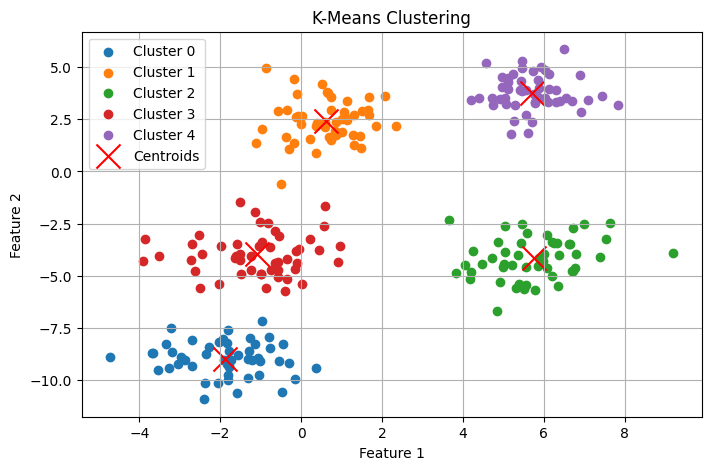

In [ ]:
# Scatter plot for the clustered data
plt.figure(figsize=(8, 5))

# Plot the clustered data points with their cluster colors
for classification in kmeans.classifications:
    cluster_data = np.array(kmeans.classifications[classification])
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {classification}')

# Plot the centroids
centroids = np.array([kmeans.centroids[centroid] for centroid in kmeans.centroids])
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='x')

plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

4.423186272677629
209.31148534426956
18.44872096007998
6.153226458092579
1.4222185101894862
2.8019365651656383


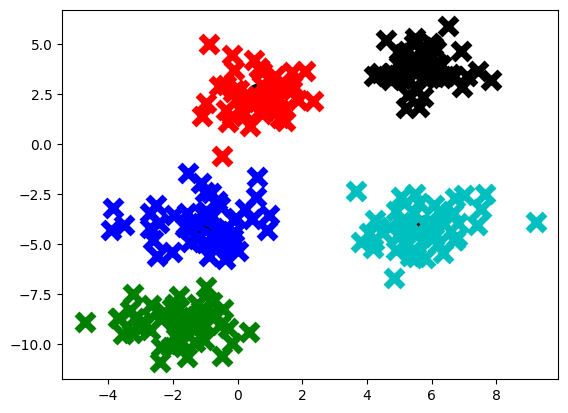

In [ ]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)

plt.show()

6287.405578119178
4.305028397698063


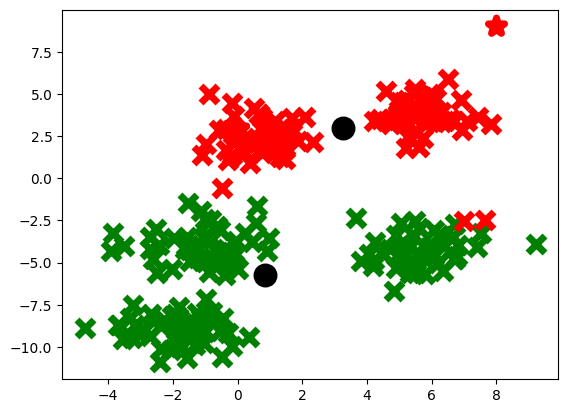

In [ ]:
clf = K_Means()
clf.fit(X)

for centroid in clf.centroids:
    plt.scatter(clf.centroids[centroid][0], clf.centroids[centroid][1],
                marker="o", color="k", s=150, linewidths=5)

for classification in clf.classifications:
    color = colors[classification]
    for featureset in clf.classifications[classification]:
        plt.scatter(featureset[0], featureset[1], marker="x", color=color, s=150, linewidths=5)



unknowns = np.array([[1,3],
                     [8,9],
                     [0,3],
                     [5,4],
                     [6,4],])

for unknown in unknowns:
    classification = clf.predict(unknown)
    plt.scatter(unknown[0], unknown[1], marker="*", color=colors[classification], s=150, linewidths=5)


plt.show()